# Predicting Customer Purchase Behavior: A Decision Tree Classifier Approach

### SkillCraft Technology DataScience Internship (Task 3)

In [1]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\important\datascience\Skill craft Internship\bank+marketing\bank.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### PREPROCESSING

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [8]:
#1. Identify Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [9]:
# 2. Initialize a Dictionary for Label Encoders
label_encoders={}

This dictionary will store the LabelEncoder objects for each categorical column. Keeping track of these encoders is helpful if you need to reverse the encoding or apply the same transformation to new data later.

In [11]:
# 3. Iterate Over Categorical Columns (Except the Target Column y)
for col in categorical_columns:
    if col != 'y':  # Skip the target column for now, We don’t encode y here because we handle it separately (as it’s the target variable).
        le=LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

Create a LabelEncoder: le = LabelEncoder(). A LabelEncoder is used to map each unique category in a column to a unique integer.<br>
Transform the Column: <br>
df[col] = le.fit_transform(df[col])<br>
fit_transform() learns the mapping from unique categories to integers and applies this transformation.<br>
Store the Encoder: label_encoders[col] = le saves the encoder for future use (e.g., decoding or applying the same encoding to new data).

In [13]:
# Encode the target variable
target_encoder = LabelEncoder() #Initialize the Encoder:
df['y'] = target_encoder.fit_transform(df['y']) # Fit and Transform the Target Column:

In [14]:
# Step 2: Split data into features and target
X = df.drop(columns=['y'])
y = df['y']

### Machine Learning Workflow:

A machine learning model is trained to predict a target variable (y) using input features (X).<br>
* To do this, we need to explicitly define:<br>
X: Input features (all the columns used for prediction).<br>
y: Target variable (the column we want to predict).

In [16]:
# Train-test split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
# Step 3: Train the Decision Tree Classifier
model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
#Step 4 : Making predition 
y_predict=model.predict(X_test)
accuracy=accuracy_score(y_test,y_predict)

In [19]:
classification_report=classification_report(y_test,y_predict)

In [20]:
accuracy

0.8718232044198895

In [21]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.93      0.92      0.93       807\n           1       0.42      0.47      0.44        98\n\n    accuracy                           0.87       905\n   macro avg       0.68      0.70      0.68       905\nweighted avg       0.88      0.87      0.88       905\n'

In [22]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split, GridSearchCV

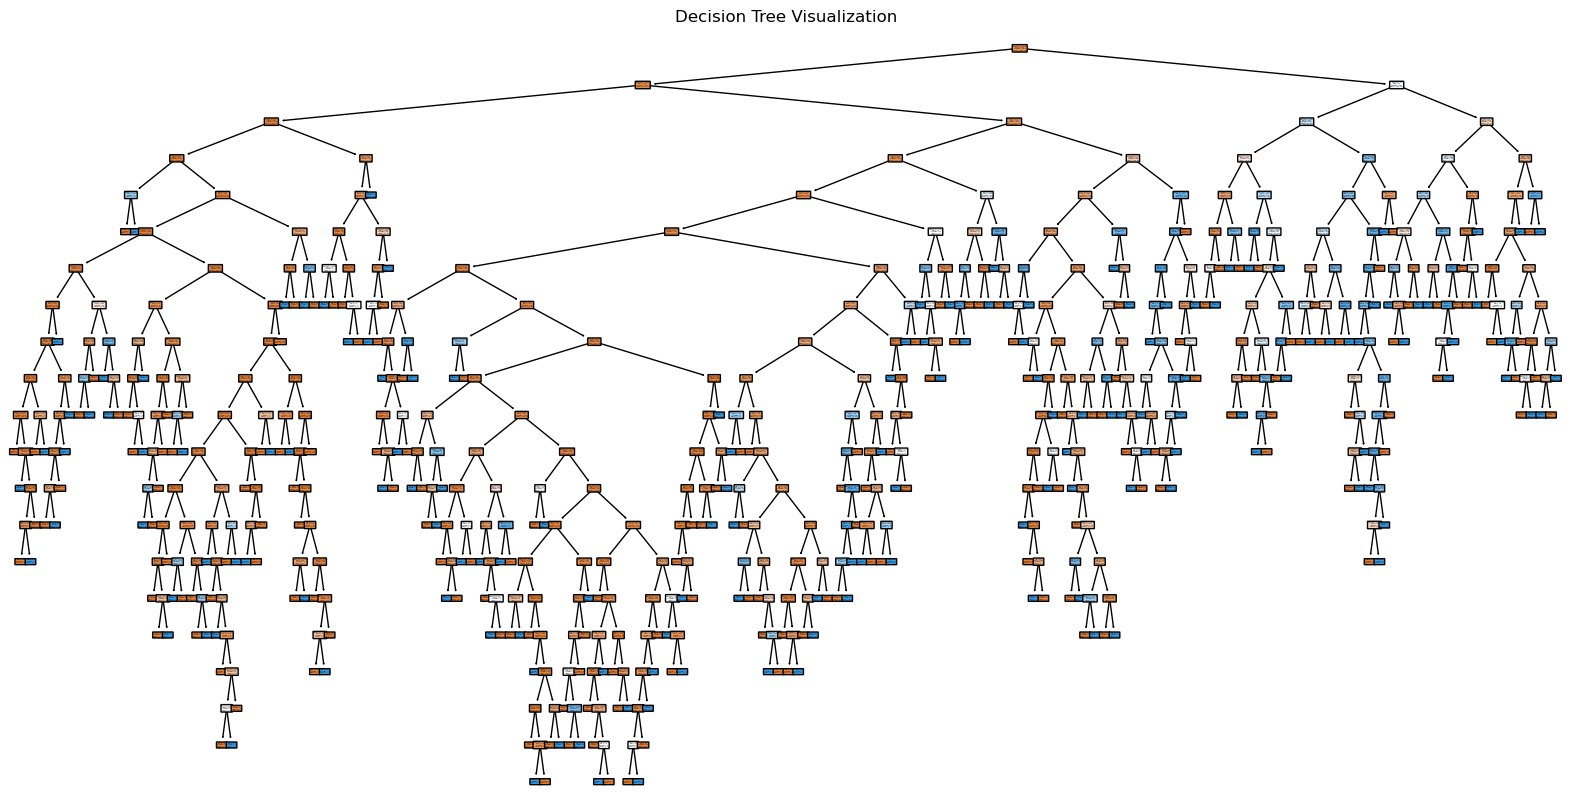

In [23]:
# Plot the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))  # Adjust the figure size for better readability
plot_tree(
    model,
    feature_names=X.columns.tolist(),  # Convert feature names to list
    class_names=target_encoder.classes_.tolist(),  # Convert class names to list
    filled=True,  # Adds color for better visualization
    rounded=True  # Rounds the edges for a cleaner look
)
plt.title("Decision Tree Visualization")
plt.show()

In [24]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

duration     0.258636
day          0.146790
balance      0.135673
age          0.099244
pdays        0.082172
month        0.064929
job          0.057127
poutcome     0.056011
campaign     0.026560
marital      0.020737
contact      0.018402
housing      0.011922
education    0.008983
previous     0.006695
loan         0.003435
default      0.002683
dtype: float64


In [45]:
# Select features with importance > 0.01
important_features = feature_importances[feature_importances > 0.01].index
X_important = X[important_features]

In [49]:
# Train-test split with the selected features
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

In [51]:
# Train a new Decision Tree Classifier
model_imp = DecisionTreeClassifier(random_state=42)
model_imp.fit(X_train_imp, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
from sklearn.metrics import classification_report

In [61]:
# Evaluate the simplified model
y_pred_imp = model_imp.predict(X_test_imp)
accuracy_imp = accuracy_score(y_test, y_pred_imp)
classification_rep_imp = classification_report(y_test, y_pred_imp)

# print(f"Accuracy with selected features: {accuracy_imp}")
print(classification_rep_imp)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       807
           1       0.44      0.49      0.46        98

    accuracy                           0.88       905
   macro avg       0.69      0.71      0.70       905
weighted avg       0.88      0.88      0.88       905



In [63]:
print(f"Accuracy with selected features: {accuracy_imp}")

Accuracy with selected features: 0.876243093922652


## Prediction

In [65]:
#Now Predicting
# Example: New customer data (ensure all preprocessing steps are applied)
new_data = {
    'age': 35,
    'job': 'technician',
    'marital': 'married',
    'education': 'secondary',
    'default': 'no',
    'balance': 1200,
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'day': 15,
    'month': 'jul',
    'duration': 180,
    'campaign': 1,
    'pdays': -1,
    'previous': 0,
    'poutcome': 'unknown'
}

# Convert to DataFrame for consistency
new_data_df = pd.DataFrame([new_data])

# Encode categorical variables using the trained label encoders
for col in categorical_columns:
    if col in new_data_df.columns:
        new_data_df[col] = label_encoders[col].transform(new_data_df[col])

# Predict
prediction = model.predict(new_data_df)
predicted_label = target_encoder.inverse_transform(prediction)

print(f"Prediction: {predicted_label[0]}")


Prediction: no


In [70]:
# New customer data for prediction
new_customer = {
    'age': 30,
    'job': 'management',
    'marital': 'married',
    'education': 'tertiary',
    'default': 'no',
    'balance': 1500,
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'day': 10,
    'month': 'aug',
    'duration': 250,
    'campaign': 2,
    'pdays': -1,
    'previous': 0,
    'poutcome': 'unknown'
}

# Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Encode categorical variables
for col in categorical_columns:
    if col in new_customer_df.columns:
        new_customer_df[col] = label_encoders[col].transform(new_customer_df[col])

# Predict using the trained model
new_prediction = model.predict(new_customer_df)
decoded_prediction = target_encoder.inverse_transform(new_prediction)

print(f"Prediction: {decoded_prediction[0]}")


Prediction: no


In [72]:
# Example input data based on "yes"-likely patterns
yes_customer = {
    'age': 35,                # Age of customer
    'job': 'admin.',          # Job type
    'marital': 'married',     # Marital status
    'education': 'tertiary',  # Education level
    'default': 'no',          # Has credit in default?
    'balance': 3000,          # Account balance
    'housing': 'yes',         # Has housing loan?
    'loan': 'no',             # Has personal loan?
    'contact': 'cellular',    # Contact communication type
    'day': 15,                # Day of the month
    'month': 'aug',           # Last contact month
    'duration': 400,          # Call duration (important feature)
    'campaign': 1,            # Number of contacts during campaign
    'pdays': -1,              # Days since previous contact
    'previous': 0,            # Number of previous contacts
    'poutcome': 'unknown'     # Outcome of previous marketing campaign
}

# Convert to DataFrame
yes_customer_df = pd.DataFrame([yes_customer])

# Encode categorical variables using the label encoders
for col in categorical_columns:
    if col in yes_customer_df.columns:
        yes_customer_df[col] = label_encoders[col].transform(yes_customer_df[col])

# Predict using the trained model
yes_prediction = model.predict(yes_customer_df)
decoded_yes_prediction = target_encoder.inverse_transform(yes_prediction)

print(f"Prediction for 'Yes'-likely input: {decoded_yes_prediction[0]}")


Prediction for 'Yes'-likely input: yes


<span style="color:green;">In this project, a decision tree classifier was developed to predict whether a customer would purchase a product or service based on demographic and behavioral data from the UCI Bank Marketing dataset. The model achieved an accuracy of 87%, indicating strong predictive performance. Feature importance analysis highlighted key drivers such as call duration, account balance, and day of the month, enabling effective feature selection to simplify the model without significant loss of accuracy. By leveraging this classifier, businesses can better target potential customers, optimize marketing campaigns, and enhance decision-making processes. This project demonstrates the practical application of machine learning in customer behavior prediction to improve business outcomes.</span>